In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import random
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier

!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline   # allows the visualizations generated by matplotlib to be displayed directly in the notebook
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: snap 1.0-dev-ubuntu22.04.2-x64-py3.10 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of snap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that th

UsageError: unrecognized arguments: # allows the visualizations generated by matplotlib to be displayed directly in the notebook


In [2]:
df = pd.read_csv('/home/amir/Documents/3rd_semester/NLP/project/dataset.csv')
df.head(n=20)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [4]:
# unique languages from the 'language' column
unique_languag = set()

for l in df['language']:
    unique_languag.add(l)

unique_languag

{'Arabic',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Korean',
 'Latin',
 'Persian',
 'Portugese',
 'Pushto',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Tamil',
 'Thai',
 'Turkish',
 'Urdu'}

In [6]:
# languges without stopword access to: 'Persian', pushto, korean, Thai, Hindi, Tamil', 'Urdu', 'Latin', 'Estonian',
# 'Japanese', 

# set of unique languages with stopwrod
unique_languages = {'Arabic', 'Chinese', 'Dutch', 'English',  
                    'French', 'Indonesian','Portuguese',  
                    'Romanian', 'Russian',
                    'Spanish', 'Swedish',   'Turkish'}

# get stopwords dataset
nltk.download('stopwords')

# to see for stopwords in each language
print("Languages with available stopwords:\n")
for lang in unique_languages:
    try:
        stopwords_set = set(stopwords.words(lang.lower()))
        print(lang)
    except LookupError:
        print(f"Stopwords are not available for {lang} in NLTK.")


Languages with available stopwords:

French
Portuguese
Turkish
Russian
Romanian
Indonesian
Arabic
Chinese
English
Spanish
Swedish
Dutch


[nltk_data] Downloading package stopwords to /home/amir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
## let'see/print stopwords for Indonesian for example

print(stopwords.words('Indonesian'.lower()))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

## print List of stopwrods that we have access to.

In [9]:
# stopwords in each language.for curicity reasons. 

print("Languages with available stopwords:", '\n')
for lang in unique_languages:
    try:
        lang_code = lang.lower() 
        stopwords_set = set(stopwords.words(lang_code))
        print(f"Stopwords for {lang}: {stopwords_set}")
    except LookupError:
        print(f"Stopwords are not available for {lang} in NLTK.")


Languages with available stopwords: 

Stopwords for French: {'m', 'seras', 'eus', 'soyons', 'serai', 'les', 'ta', 'êtes', 'sa', 'fussiez', 'avait', 'seront', 'ton', 'étés', 'seriez', 'eu', 'on', 'nos', 'ayante', 'ayez', 'même', 'me', 'tes', 'que', 'sera', 'mes', 'avaient', 'dans', 'avons', 'fussions', 'aurions', 'toi', 'eûmes', 'ayant', 'avez', 'du', 'te', 'des', 'mon', 'c', 'fusses', 'étions', 'pour', 'auront', 'l', 'votre', 'eue', 'eûtes', 'ce', 'aurais', 'eusses', 'un', 't', 'ont', 'étante', 'étais', 'fûtes', 'se', 'sont', 'soient', 'eusse', 'sur', 'fussent', 'soit', 'été', 'est', 'es', 'aies', 'qui', 'serez', 'étées', 'fusse', 'eurent', 'qu', 'aurai', 'ayons', 'eussent', 'ma', 'fus', 'avais', 'auras', 'aie', 'auraient', 'aux', 'pas', 'était', 'soyez', 'ayants', 'aient', 'auriez', 'il', 'ai', 'étaient', 'mais', 'seraient', 'fûmes', 'fût', 'ait', 'ces', 'étant', 'as', 'moi', 'tu', 'fut', 'notre', 'eussiez', 'aurez', 'suis', 'aura', 'aurons', 'de', 'eût', 'son', 'la', 'en', 'leur', 'a

###  This calculates the length (number of characters) of each text in the column. For example: There are 139 occurrences of Text with a length of 186, 125 occurrences of Text with a length of 144, and so on.

In [10]:
df["Text"].apply(len).value_counts()

186     139
144     125
147     118
141     115
146     115
       ... 
1068      1
1262      1
1064      1
1271      1
1205      1
Name: Text, Length: 1185, dtype: int64

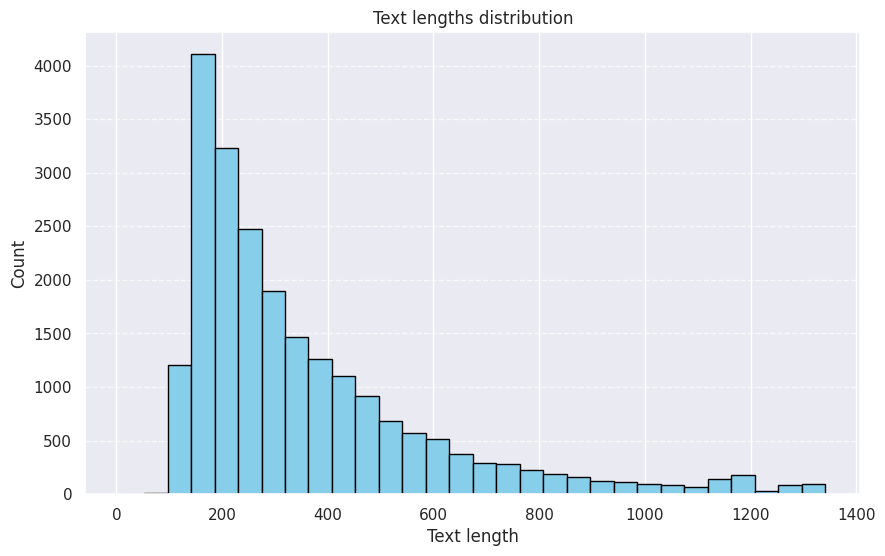

In [11]:
df_Text_Length = df["Text"].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df_Text_Length, bins=30, color='skyblue', edgecolor='black')
plt.title('Text lengths distribution')
plt.xlabel('Text length')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# data is not imbalanced

In [12]:
df["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

Language names make up our output variable, which is a categorical variable. We are conducting label encoding on that output variable since we should turn it into a numerical form for training .

In [13]:
df.fillna("", inplace=True)
df.isna().sum()

Text        0
language    0
dtype: int64

The function, get_named_entities, is not directly related to language detection. Instead, it focuses on extracting named entities (e.g., persons, organizations, locations) from a given text using spaCy. 

# In the code given below:

## 1- The code initializes a SnowballStemmer (which performs stemming) for the English language. It then applies stemming to each token in the list (tokens). Stemming involves reducing words to their base or root form. In this case, it converts words to their stems in a case-insensitive manner.
## 2- Stopwords are common words (e.g., "the," "and," "is") that often don't contribute much to the meaning of a text. The code uses NLTK's list of English stopwords to create a set of stopwords. The list comprehension filters out tokens that are stopwords.
## 3- each text in the column undergoes the cleaning and preprocessing steps defined in the clean_text function.
## 4- Text is already lower cased.


In [14]:
df.tail()

,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian


In [15]:
import string

def clean_text_based_on_language(text, language):
    tokens = word_tokenize(text)
    tokens = [''.join(char for char in token if char not in string.punctuation) for token in tokens]

    # language-specific stopwords
    if language.lower() in unique_languages:
        try:
            stop_words = set(stopwords.words(language.lower()))
        except LookupError:
            print(f"Stopwords are not available for {language} in NLTK. Using English stopwords.")
            stop_words = set(stopwords.words('english'))
    else:
        stop_words = set()

    #  Snowball stemmer with English stopwords for English language
    if language.lower() == 'english':
        stemmer = SnowballStemmer(language='english')
        clean_tokens = [stemmer.stem(token.lower()) for token in tokens if token.lower() not in stop_words]
    else:
        clean_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

    clean_text = ' '.join(clean_tokens)
    return clean_text

df['Cleaned_Text'] = df.apply(lambda row: clean_text_based_on_language(row['Text'], row['language']), axis=1)
df.head(20)


,Text,language,Cleaned_Text
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameeriti ning ...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebes joseph pereira thomas på eng the jesuits...
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spons behoort tot het geslacht haliclona en...
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish,tsutinalar i̇ngilizce tsuutina kanadada albert...
7,müller mox figura centralis circulorum doctoru...,Latin,müller mox figura centralis circulorum doctoru...
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu,برقی بار electric charge تمام زیرجوہری ذرات کی...
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...


## The result is a sparse matrix X where each row corresponds to a document (text) and each column corresponds to a unique term in the entire document collection.
## The resulting DataFrame has the TF-IDF values as its data, and the columns correspond to the unique words in the document collection.

In [16]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(df['language'])
label = pd.DataFrame({'language': y_encoded})
label

,language
0,4
1,17
2,19
3,18
4,2
...,...
21995,5
21996,19
21997,16
21998,1


# Index check 

In [17]:
# what is the original language for label 21 ?

language_for_label_2 = label_encoder.inverse_transform([11])[0] # [0] to access the first element
language_for_label_2

'Persian'

In [18]:
# this part shows what is the amonut of 80 and 20 percent of 22000.

df_2 = df["Text"].apply(len)

split_train_amount = int(0.8 * len(df_2))
split_test_amount = int(0.2 * len(df_2))

print("Train amount =", ' ', split_train_amount, 'rows')

print("Test amount =", ' ', split_test_amount, 'rows')

Train amount =   17600 rows
Test amount =   4400 rows


In [19]:
# how about work with 20 percent of data for each language ?

sampled_data = pd.DataFrame(columns=df.columns)

for lang in df['language'].unique():
    lang_data = df[df['language'] == lang]     # Select all rows for the current language
    
    sample_size = int(0.2 * len(lang_data))
    sampled_data = sampled_data.append(lang_data.sample(n=sample_size, random_state=42)) # random_state 

sampled_data.reset_index(drop=True, inplace=True) # reset the index of the new DataFrame
sampled_data = sampled_data.sample(frac=1, random_state=42).reset_index(drop=True) # shuffle 

sampled_data

,Text,language,Cleaned_Text
0,darusalam är en ort i gambia den ligger i regi...,Swedish,darusalam är en ort i gambia den ligger i regi...
1,برخی از مورخان عقیده دارند که در سده‌های و پ...,Persian,برخی از مورخان عقیده دارند که در سده‌های و پیش...
2,مايو - أطلق الجنود السعوديون النار على طفل ي...,Arabic,مايو أطلق الجنود السعوديون النار على طفل يبلغ...
3,年の公職選挙法改正（小選挙区比例代表並立制施行）以降の選挙では、年の第回衆議院議員総選挙で山...,Japanese,年の公職選挙法改正（小選挙区比例代表並立制施行）以降の選挙では、年の第回衆議院議員総選挙で山...
4,cornelius castoriades neograece κορνήλιος καστ...,Latin,cornelius castoriades neograece κορνήλιος καστ...
...,...,...,...
4395,صوت زیبا و توأم با حزن استاد متولی عبدالعال با...,Persian,صوت زیبا و توأم با حزن استاد متولی عبدالعال با...
4396,เหล่าเอเลี่ยนพยายามที่จะทำลายฐานกำลังด้วยการยิ...,Thai,เหล่าเอเลี่ยนพยายามที่จะทำลายฐานกำลังด้วยการยิ...
4397,malpighi observó por primera vez células vivas...,Spanish,malpighi observó por primera vez células vivas...
4398,ca și în multe alte societăți în japonia veche...,Romanian,ca și în multe alte societăți în japonia veche...


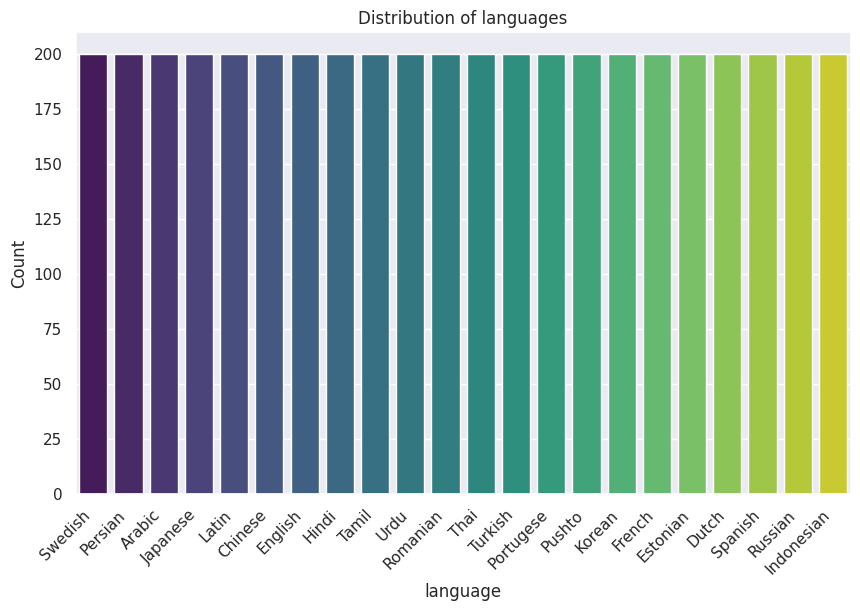

In [20]:
#  frequency distribution of each language
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'language', data = sampled_data, palette = 'viridis')
plt.title('Distribution of languages')
plt.xlabel('language')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

In [21]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(sampled_data['Text'])
X = pd.DataFrame.sparse.from_spmatrix(X)
X

,0,1,2,3,4,5,6,7,8,9,...,86851,86852,86853,86854,86855,86856,86857,86858,86859,86860
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(sampled_data['language'])

label = pd.DataFrame({'language': y_encoded})
label

,language
0,17
1,11
2,0
3,8
4,10
...,...
4395,11
4396,19
4397,16
4398,14


In [23]:
XX_train, XX_test, YY_train, YY_test = train_test_split(X , label, test_size = 0.20, random_state = 42)
print((XX_train.shape, YY_train.shape, XX_test.shape, YY_test.shape))

((3520, 86861), (3520, 1), (880, 86861), (880, 1))


In [ ]:
lr = LogisticRegression()

param_grid = {
    'C': [1, 5, 10],
    'max_iter': [500, 600, 700],
}

grid_search = GridSearchCV(lr, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1) # -1 to use all available CPU cores

grid_search.fit(XX_train, YY_train)

/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [19]:
best_params = grid_search.best_params_
print("Best Hyperparameters for LogisticRegression:", best_params)

best_lr_model = grid_search.best_estimator_
y_pred1 = best_lr_model.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred1) * 100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred1, target_names= class_names)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:\n")
print(classification_rep)

Best Hyperparameters for LogisticRegression: {'C': 1, 'max_iter': 500}
Accuracy : 94.77%
Classification Report:

              precision    recall  f1-score   support

      Arabic       1.00      0.97      0.99        35
     Chinese       0.85      0.40      0.55        42
       Dutch       1.00      0.95      0.97        41
     English       0.84      1.00      0.92        49
    Estonian       0.93      1.00      0.96        37
      French       1.00      0.97      0.98        30
       Hindi       1.00      1.00      1.00        33
  Indonesian       1.00      0.96      0.98        45
    Japanese       0.55      0.95      0.70        39
      Korean       1.00      1.00      1.00        42
       Latin       0.98      0.98      0.98        41
     Persian       1.00      1.00      1.00        52
   Portugese       1.00      0.95      0.97        38
      Pushto       1.00      0.95      0.98        42
    Romanian       1.00      0.98      0.99        41
     Russian       1.0

In [ ]:
cm = confusion_matrix(YY_test, y_pred1)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="Greens", xticklabels= class_names, yticklabels= class_names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#custom_text_english = ["This is a sample sentence in the language you want to classify."]
# custom_text_swedish = ["Det här är en testmening på svenska"].
custom_text_persian = ["بلبلی برگ گلی خوش رنگ در منقار داشت"]

X_custom = tfidf_vectorizer.transform(custom_text_persian)
y_pred1 = best_lr_model.predict(X_custom)

print(f"Predicted Language: {y_pred1[0]}")

## Multinomial Naive Bayes

In [80]:
mnb = MultinomialNB()

param_grid = {
    'alpha': [0.1,0.2, 0.3, 0.8, 1.0, 10.0],
}

grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(XX_train, YY_train)

/home/amir/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/amir/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/amir/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/amir/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minver

/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/amir/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.8, 1.0, 10.0]},
             scoring='accuracy')

In [81]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_mnb_model = grid_search.best_estimator_
y_pred3 = best_mnb_model.predict(XX_test)

accuracy = accuracy_score(YY_test, y_pred3)*100
class_names = label_encoder.classes_
classification_rep = classification_report(YY_test, y_pred3, target_names=class_names)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'alpha': 0.1}
Accuracy: 95.34%
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      0.97      0.99        35
     Chinese       0.95      0.43      0.59        42
       Dutch       1.00      1.00      1.00        41
     English       0.77      1.00      0.87        49
    Estonian       0.95      1.00      0.97        37
      French       0.94      1.00      0.97        30
       Hindi       1.00      1.00      1.00        33
  Indonesian       1.00      1.00      1.00        45
    Japanese       0.63      0.79      0.70        39
      Korean       1.00      1.00      1.00        42
       Latin       1.00      0.95      0.97        41
     Persian       1.00      1.00      1.00        52
   Portugese       1.00      0.97      0.99        38
      Pushto       1.00      0.98      0.99        42
    Romanian       0.95      0.98      0.96        41
     Russian       1.00      1.00      1.00        35
    

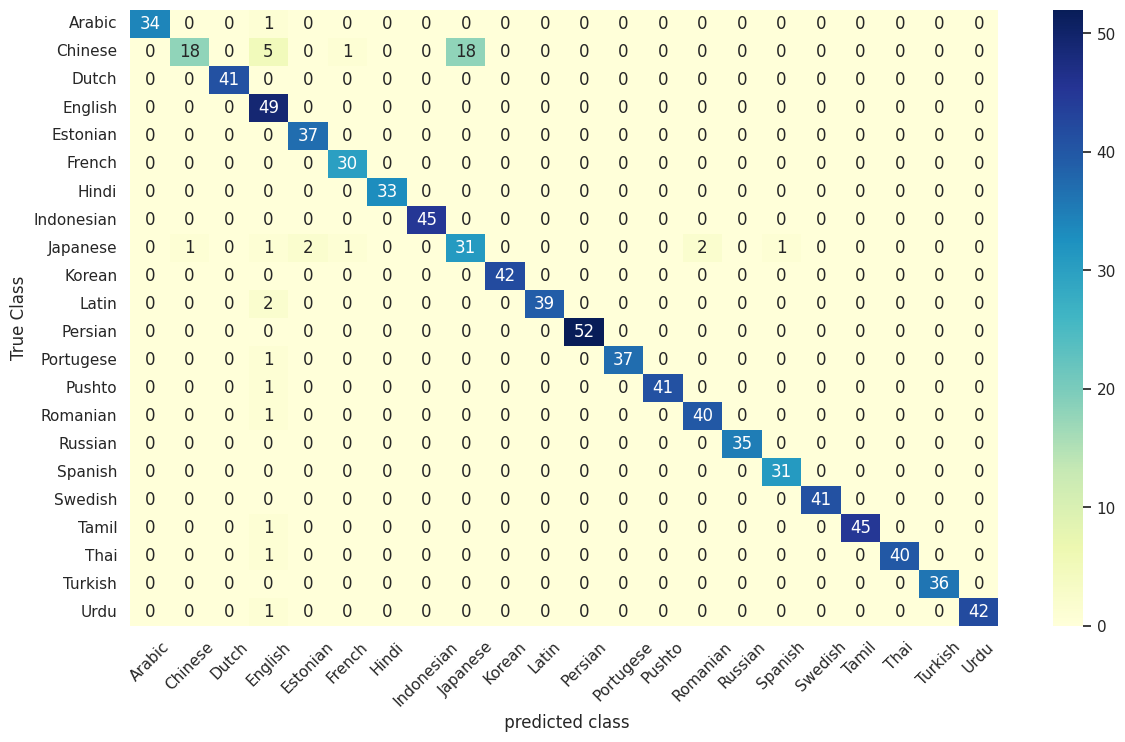

In [84]:
cm = confusion_matrix(YY_test, y_pred3)

plt.figure(figsize = (14,8))
sns.heatmap(cm, annot=True, cmap="Greens", xticklabels= class_names, yticklabels= class_names)
plt.xlabel(' predicted class')
plt.ylabel('True Class')
plt.xticks(rotation=45)
plt.show()
     

## For example, there are 18 instances where the true class was Chinese, but the model predicted class Japanese.

https://212digital.medium.com/what-is-lemmatization-and-stemming-in-nlp-e25e142332c4

https://dev.to/cyber_holics/introduction-to-natural-language-processing-with-python-language-detection-as-a-use-case-4iao

## do you want to use BOW, Stop words removal, Name Entity Recognition (NER)

input file from this :
    
https://www.kaggle.com/code/martinkk5575/language-detection/input

In [134]:
# filter to only include  English texts
english_texts_df = df[df['language'] == 'English'][['Text']]
print(english_texts_df.iloc[0]['Text'])

in  johnson was awarded an american institute of architects gold medal in  he became the first recipient of the pritzker architecture prize the most prestigious international architectural award


In [135]:
english_texts_df

,Text
37,in johnson was awarded an american institute ...
40,bussy-saint-georges has built its identity on ...
76,minnesotas state parks are spread across the s...
90,nordahl road is a station served by north coun...
97,a talk by takis fotopoulos about the internati...
...,...
21829,on march empty mirrors press published epste...
21879,he [musk] wants to go to mars to back up human...
21896,overall the male is black above and white belo...
21897,tim reynolds born december in wiesbaden germ...


In [136]:
from nltk.tokenize import sent_tokenize

E_text = english_texts_df.iloc[900]['Text']
sentences = sent_tokenize(E_text)
print(sentences)


['virtually nothing is known of the past of janice before she first appeared as joystick including the origin and nature of her apparent superhuman powers when she was much younger her father a gambler taught her his philosophy to always have a card to play she then used this philosophy to great advantage when she helped a mobster rob her father to save her own life later she was a student at the university of arizona living a life she later considered to be a bore after her sophomore year something happened to change her apparently resulting in her death in her "new life" she became determined to live life on the edge and began taking extreme risks she then disappeared for three years before reappearing as joystick']


### if there are m documents and n unique words, then the TF-IDF matrix X will have dimensions m x n.
### 

## Text summarization on small sentences does not work. we need a larger amount of texts for an efficient text summarization with these tools. 

Why Using Neural Networks for Language Detection
The task of language detection seems rather easy, isn’t it enough to count how many words occur in each language-specific dictionary and then return the language with the highest count?

Looking at the model card of the papluca/xlm-roberta-base-language-detection model, we see that it achieves an accuracy of 99.6% over the test set of the Language Identification dataset. Another common library for language detection, langid, works by looking for a subset of these dictionary matches and assigning them individual weights learned with Naive Bayes. The langid library achieves 98.5% accuracy on the same test set.

So, there’s a small improvement in accuracy when using neural networks, with the downside that they are slower. Whether to use neural networks or not depends on understanding whether that 1% improvement in accuracy is important for your specific use case.

In [40]:
#X = pd.DataFrame.sparse.from_spmatrix(X)

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

texts = english_texts_df['Text']

# TF-IDF  vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# clustering with K-Means method
num_clusters = 5
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
kmeans.fit(X)

# give cluster labels to the dataframe
english_texts_df['cluster'] = kmeans.labels_

# Print the clusters
for cluster_num in range(num_clusters):
    cluster_samples = english_texts_df[english_texts_df['cluster'] == cluster_num]['Text']
    print(f"\nCluster {cluster_num}:\n")
    print(cluster_samples.head(10))

# (37, 155, 502, 1014, 1091, ...) on the left side correspond to the indices of the text samples in Cluster 0.


Cluster 0:

37      in  johnson was awarded an american institute ...
155     since the days of the revolution a one-room st...
502     in october  the american civil liberties union...
1014    chs has had a major addition every  to  years ...
1091    as of  the gender distribution of the populati...
1228    philip cortelyou johnson july   – january   wa...
1328    in the east at the distance  kilometres  miles...
1372    the farm of génitoy the name genesterium in la...
1416    st place in story of the year freedom of the p...
1848    some of the local issues hanna was known to ca...
Name: Text, dtype: object

Cluster 1:

107    while running a campaign to elect his sister s...
127    reynolds was born in wiesbaden germany where h...
158    the boys soccer team was coached by gene chyzo...
230    reynolds has a son josef born in february  wit...
235    the other more probable account starts in  whe...
237    there was a reaction to these changes complain...
348    the film introduces

In [104]:
for cluster_num in range(num_clusters):
    num_documents_in_cluster = english_texts_df[english_texts_df['cluster'] == cluster_num].shape[0]
    print(f"Cluster {cluster_num}: {num_documents_in_cluster} documents")


Cluster 0: 128 documents
Cluster 1: 291 documents
Cluster 2: 88 documents
Cluster 3: 423 documents
Cluster 4: 70 documents


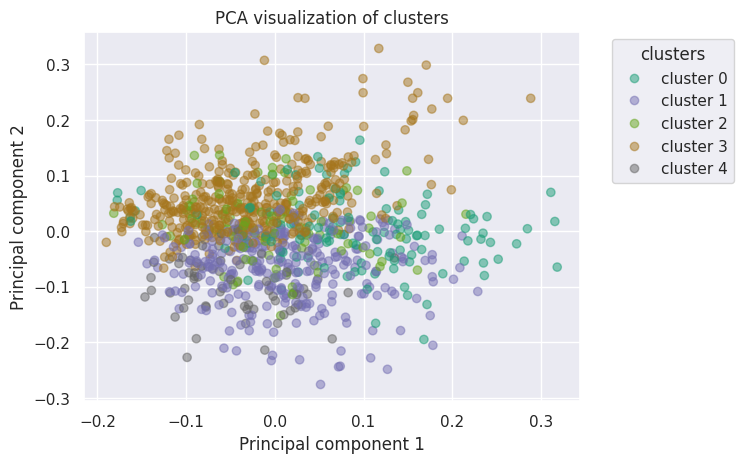

In [109]:
from sklearn.decomposition import PCA

# applying PCA to the TF-IDF matrix
pca = PCA(n_components=2)  # 2 for 2D visualization
X_pca = pca.fit_transform(X.toarray())

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='Dark2', alpha=0.5)

legend_labels = [f'cluster {i}' for i in range(num_clusters)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('PCA visualization of clusters')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

## In the context of clustering, "fitting" means finding the centroids of clusters that minimize the sum of squared distances from each point in the dataset to its assigned centroid.  In K-Means clustering, the algorithm assigns documents to clusters based on the similarity of their feature representations.  The policy for assigning a document to a cluster is determined by the centroid it is closest to. If the feature vector of a document is closer to the centroid of Cluster A than to the centroids of other clusters, it will be assigned to Cluster A.

In [36]:
print("Shape of X:", X.shape)

Shape of X: (1000, 11116)


## so we have 1000 terms (docs) and 11116 unique words. there are 11116 columns, and each column represents a unique term (word) inthe  entire collection of documents.

## K-Means groups documents into clusters based on their feature vectors (in this case, the TF-IDF vectors).  The similarity is determined based on the Euclidean distance between the TF-IDF vectors of the documents.

In [33]:
#pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: snap 1.0-dev-ubuntu22.04.2-x64-py3.10 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of snap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.16.0-unknown has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that th

## In the TF-IDF matrix, each row corresponds to a document (text), and each column corresponds to a unique word in the entire corpus. The values in the matrix represent the TF-IDF scores for each word in each document.

## The "TF-IDF sum" for a word in a cluster is the sum of its TF-IDF scores across all documents in that cluster. The code snippet in question is identifying the 10 words with the highest TF-IDF sums in a specific cluster.

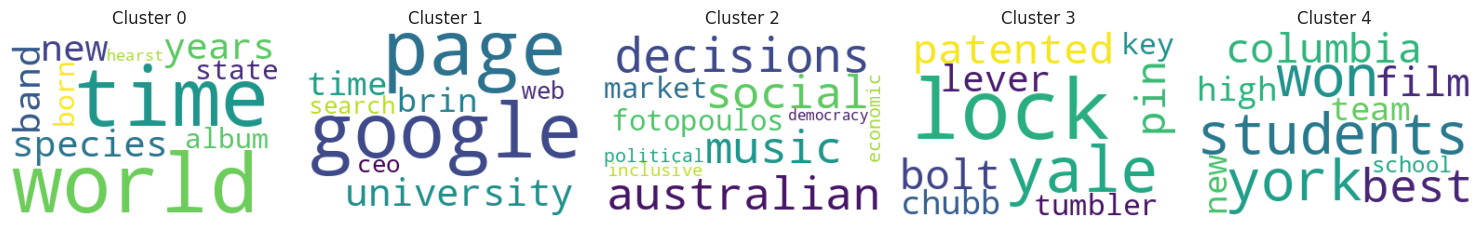

In [37]:
from wordcloud import WordCloud

fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5))

for cluster_num, ax in zip(range(num_clusters), axes):
    cluster_texts = english_texts_df[english_texts_df['cluster'] == cluster_num]['Text']
    cluster_vectorizer = TfidfVectorizer(stop_words='english')
    cluster_X = cluster_vectorizer.fit_transform(cluster_texts)
    
    # 10 most frequent words
    feature_names = cluster_vectorizer.get_feature_names_out()
    top_words_indices = cluster_X.sum(axis=0).argsort()[0, -10:]
    top_words = [feature_names[i] for i in top_words_indices]
    
    # to convert each word to a string
    top_words = [str(word) for word in top_words]

    # Create a word cloud
    wordcloud = WordCloud(width=300, height=200, background_color='white').generate(' '.join(top_words).replace("'", ""))

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Cluster {cluster_num}')

plt.tight_layout()
plt.show()


## 1st  cluster : time  / world
## 2nd cluster : page / google
## 3rd  cluster : music / social / decisions
## 4th  cluster : lock / yale (yale is a brand also)
## 5th  cluster : students / york (place and university)